# 1
Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain A and 13 mice in strain B. Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observed tumor counts for the two populations are

$yA = (12,9,12,14,13,13,15,8,15,6)$

$yB = (11,11,10,9,9,8,7,10,6,8,8,9,7).$

a) Find the posterior distributions, means, variances and 95% quantilebased confidence intervals for A and B, assuming a Poisson sampling distribution for each group and the following prior distribution: A gamma(120,10), B gamma(12,1), p(A, B) = p(A)×p(B).

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

In [2]:
# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

In [3]:
y_A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
y_B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

In [4]:
# prior parameters for theta ~ gamma(a,b) 
a_A = 120
b_A = 10
priorA=st.gamma(a_A,scale=1/b_A)

# data in group A(no bachelor's) and posterior distribution
# n=number of observed women, sy=sum of their numbers of chldren
nA =  len(y_A)
syA = sum(y_A)
postA = st.gamma(a_A+syA, scale=1/(b_A+nA))
# posterior mean (Group A)
postA_mean = (a_A+syA)/(b_A+nA)
# posterior variance (Group A)
postA_var = (a_A+syA)/(b_A+nA)**2
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a_A+syA, scale=1/(b_A+nA))
ubA=gamma.ppf(0.975, a_A+syA, scale=1/(b_A+nA))

# prior parameters for theta ~ gamma(a,b) 
a_B = 12
b_B = 1
priorB=st.gamma(a_B,scale=1/b_B)
# data in group B(bachelor's) and posterior distribution
nB = len(y_B)
syB = sum(y_B)
postB = st.gamma(a_B+syB, scale=1/(b_B+nB))
# posterior mean (Group B)
postB_mean = (a_B+syB)/(b_B+nB)
# posterior variance (Group B)
postB_var = (a_B+syB)/(b_B+nB)**2
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a_B+syB, scale=1/(b_B+nB))
ubB=gamma.ppf(0.975, a_B+syB, scale=1/(b_B+nB))

print("Posterior distribution of A: gammma(%d, %d)" %(a_A+syA,b_A+nA))
print("posterior means of A:", postA_mean)
print("posterior variances of A:", postA_var)
print("posterior 95% CI of A:", (lbA, ubA))

print("Posterior distribution of B: gammma(%d, %d)" %(a_B+syB,b_B+nB))
print("posterior means of B:", postB_mean)
print("posterior variances of B:", postB_var)
print("posterior 95% CI of B:", (lbB, ubB))

Posterior distribution of A: gammma(237, 20)
posterior means of A: 11.85
posterior variances of A: 0.5925
posterior 95% CI of A: (10.389238190941795, 13.405448325642006)
Posterior distribution of B: gammma(125, 14)
posterior means of B: 8.928571428571429
posterior variances of B: 0.6377551020408163
posterior 95% CI of B: (7.432064219464302, 10.560308149242363)


b) Compute and plot the posterior expectation of B under the prior distribution B gamma(12×n0, n0) for each value of n0 2 {1, 2, . . . , 50}. Describe what sort of prior beliefs about B would be necessary in order for the posterior expectation of B to be close to that of A.

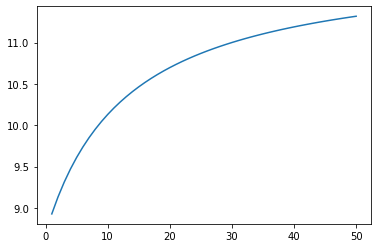

In [5]:
n_0 = np.linspace(1,50)
post_exp_B = (12*n_0+syB)/(n_0+nB)
plt.plot(n_0, post_exp_B)
plt.show()

# 2

![KakaoTalk_20210318_183928109.jpg](KakaoTalk_20210318_183928109.jpg)

# 3

![KakaoTalk_20210318_183928109_01.jpg](KakaoTalk_20210318_183928109_01.jpg)